In [1]:
# idea we need to change the style of CNN 
import os   
import numpy as np 
import pandas as pd 
import tensorflow as tf
from __future__ import print_function 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.regularizers import l2 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline 

# Train, Test, Pred Samples 
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os 

batch_size = 32
num_classes = 6


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

train_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'  
test_data_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'    
pred_data_dir = '/kaggle/input/intel-image-classification/seg_pred'  

dataget = ImageDataGenerator(rescale = 1./255) 

train_generator = dataget.flow_from_directory(
        train_data_dir,  
        target_size = (150,150), 
        batch_size = batch_size, 
        class_mode = 'categorical', 
        shuffle = True
) 

test_generator = dataget.flow_from_directory(
    test_data_dir, 
    target_size = (150, 150), 
    batch_size = batch_size, 
    class_mode = 'categorical', 
    shuffle = False

) 

pred_generator = dataget.flow_from_directory(
   pred_data_dir, 
   target_size = (150, 150), 
    batch_size = batch_size, 
    class_mode = None, 
    shuffle = False 
) 

# Get the number of samples in each dataset  
num_train_samples = train_generator.samples 
num_test_samples = test_generator.samples 
num_pred_samples = pred_generator.samples  


print('Number of traning samples:', num_train_samples)
print('Number of testing samples:', num_test_samples)
print('Number of prediction samples:', num_pred_samples) 

x_train, y_train = next(train_generator) 
x_test, y_test = next(test_generator) 
x_pred = next(pred_generator)
 
    
    

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.
Number of traning samples: 14034
Number of testing samples: 3000
Number of prediction samples: 7301


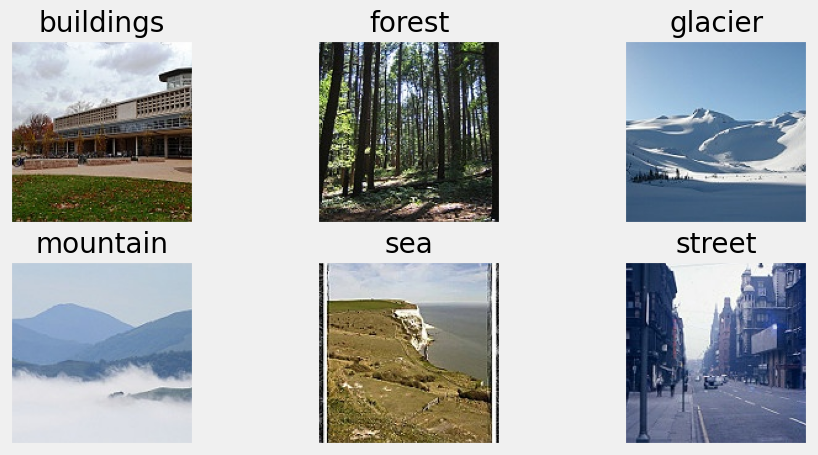

In [3]:
# Visualizing Intel Dataset 
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

fig = plt.figure(figsize=(10, 5))
for i in range(len(class_names)): 
    ax = fig.add_subplot(2, 3, 1+i, xticks=[], yticks=[])
    class_dir = os.path.join(train_data_dir, class_names[i]) 
    
    # pass the class directory to list directory 
    img_filenames = os.listdir(class_dir)
    img_path = os.path.join(class_dir, img_filenames[0]) 
    im = plt.imread(img_path) 
    ax.set_title(class_names[i]) 
    plt.imshow(im) 
plt.show() 
    

In [4]:
# convert class vectors to binary class matrices 
y_train = tf.keras.utils.to_categorical(y_train, num_classes) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



## Designing The Convolution Neural Network

In [5]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation 
from tensorflow.keras.regularizers import l2 


num_classes = 6 

model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', input_shape = x_train.shape[1:])) 
model.add(Activation('relu')) 
model.add(BatchNormalization()) 
model.add(Conv2D(64, (3,3))) 
model.add(Activation('relu')) 
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(128, (3,3), padding='same')) 
model.add(Activation('relu')) 
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))


model.add(Flatten()) 
model.add(Dense(512, kernel_regularizer=l2(0.01))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes)) 
model.add(Activation('softmax')) 

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy']) 



In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 activation (Activation)     (None, 150, 150, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 148, 148, 64)     256       
 hNormalization)                                        

## Compiling and Training the Model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

epoch = 60 

# Training the model 
history = model.fit(train_generator, epochs = epoch, validation_data = test_generator, shuffle=True) 



Epoch 1/60


2023-06-22 03:33:31.603694: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


439/439 [==============================] - 116s 233ms/step - loss: 12.9010 - accuracy: 0.4930 - val_loss: 10.0432 - val_accuracy: 0.6260
Epoch 2/60
439/439 [==============================] - 93s 212ms/step - loss: 9.3070 - accuracy: 0.6042 - val_loss: 8.4946 - val_accuracy: 0.6923
Epoch 3/60
439/439 [==============================] - 93s 212ms/step - loss: 7.8966 - accuracy: 0.6581 - val_loss: 7.2946 - val_accuracy: 0.6960
Epoch 4/60
439/439 [==============================] - 99s 225ms/step - loss: 6.7353 - accuracy: 0.6932 - val_loss: 6.8822 - val_accuracy: 0.5747
Epoch 5/60
439/439 [==============================] - 94s 214ms/step - loss: 5.7622 - accuracy: 0.7210 - val_loss: 5.3704 - val_accuracy: 0.7443
Epoch 6/60
439/439 [==============================] - 94s 214ms/step - loss: 4.9374 - accuracy: 0.7457 - val_loss: 4.7062 - val_accuracy: 0.7423
Epoch 7/60
439/439 [==============================] - 94s 213ms/step - loss: 4.2319 - accuracy: 0.7760 - val_loss: 4.1196 - val_accuracy: 

## Model Evaluation 

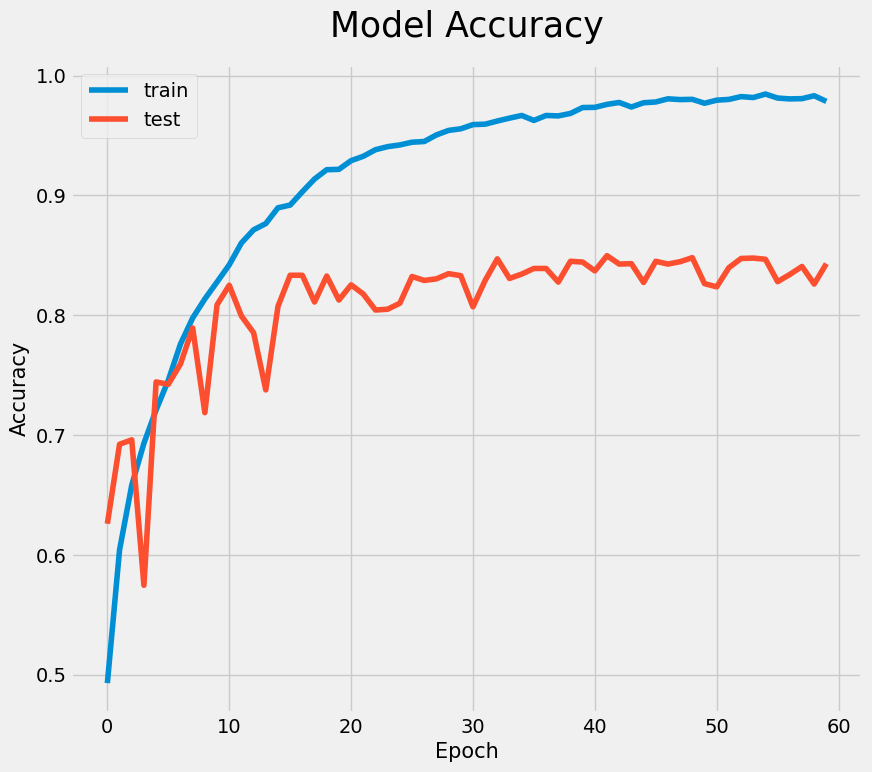

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=[20, 8]) 

# the accuracy 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model Accuracy', size=25, pad=20) 
plt.ylabel('Accuracy', size=15) 
plt.xlabel('Epoch', size=15) 
plt.legend(['train', 'test'], loc='upper left')   

plt.show()

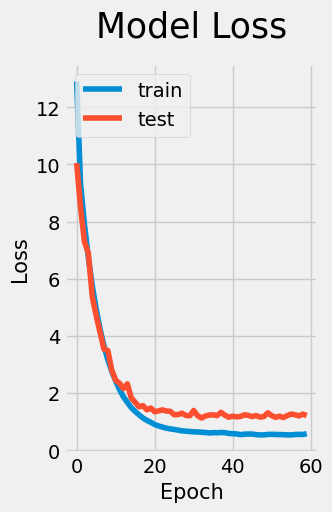

In [9]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss', size=25, pad=20) 
plt.ylabel('Loss', size=15) 
plt.xlabel('Epoch', size=15) 
plt.legend(['train', 'test'], loc='upper left') 

plt.show() 
